# Homework 2: Problems
## Due Friday 26 October

### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1  (50 points)
On Data Camp:

Statistical Thinking in Python (Part 2): Bootstrap confidence intervals 

This is Chapter 2.  You shouldn't need Chapter 1, but you are welcome to do it.  If this chapter interests you, then you might get something out of completing Chapters 3 and 4 as well.

## Problem 2 (25 points)
Repeat the simple MLE example from class (Inference2.ipynb), but with 2 changes.  First allow for a variable number of data points (and show for `N=3` and `N=10`.  Second, limit the range of valid solutions for $\mu$ to $\mu>1.1$ (just for `N=10`).  How does that affect your results?  Use a random seed of 42 for all.


## Problem 3 (25 points)

Produce the "trace" plot for the clear/cloudy day problem from Inference2.ipynb.  Then plot the histogram of that trace, throwing away steps in the trace that could be considered part of the burn-in.  Your plots should look like the ones from class (or nicer!).  Confirm that you get the same answer for day $N$ as day $N+1$ and it doesn't matter whether is was clear or cloudy on the day that you started. 

Posterior PDF for N=3 is maximized at 1.033
Posterior PDF for N=10 and mu > 1.1 is maximized at 1.309


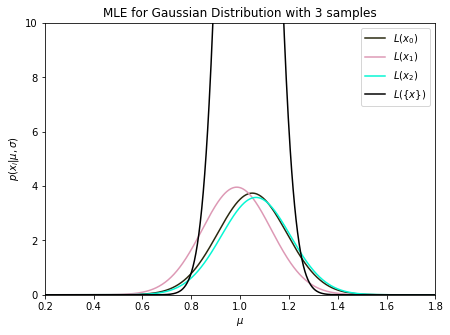

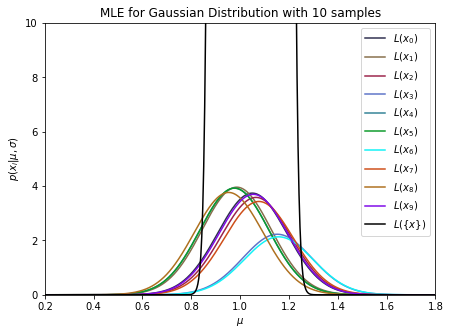

In [72]:
# Problem 2
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
%matplotlib inline

def generate_sample(mu, sigma, N):
    np.random.seed(42)
    sample = norm(mu,sigma).rvs(N)
    return sample

def make_plot(sample, sigma, mu_lim=None):
    plt.subplots(figsize=(7, 5))
    mu_grid = np.linspace(0,2,1000)
    prior = norm.pdf(mu_grid,loc=mu,scale=sigma)
    P = []
    P_tot = None
    for i in range(len(sample)):
        L_norm = norm.pdf(mu_grid,loc=sample[i],scale=sigma)
        P_norm = prior * L_norm
        P.append(P_norm)
        plt.plot(mu_grid, P_norm, ls='-', c=np.random.rand(3,), label=r'$L(x_' + str(i) + r')$')
        P_tot = (P_tot * P_norm) if P_tot is not None else P_norm
        
    plt.plot(mu_grid, P_tot, ls='-', c='black', label=r'$L(\{x\})$')

    plt.xlim(0.2, 1.8)
    plt.ylim(0, 10.0)
    plt.xlabel('$\mu$') #Leave out or adjust if no latex
    plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
    plt.title('MLE for Gaussian Distribution with ' + str(len(sample)) + ' samples')
    plt.legend()
    return P_tot, mu_grid

def posterior_pdf_max(post, mu_grid, mu_lim=None):
    if mu_lim:
        post = post[post > mu_lim]
        mu_grid = mu_grid[mu_grid > mu_lim]
        
    idx = np.argsort(post)
    mu_max = mu_grid[idx[-1]]
    return mu_max

def MLE(mu, sigma, N, mu_lim=None):
    sample = generate_sample(mu, sigma, N)
    p, grid = make_plot(sample, sigma)
    m = posterior_pdf_max(p, grid, mu_lim)
    
    res = "Posterior PDF for N=" + str(N)
    if mu_lim:
        res = res + ' and mu > ' + str(mu_lim)
    res = res + ' is maximized at %.3f' % m
    print(res)


mu = 1.0
sigma = 0.2
MLE(mu, sigma, 3)
MLE(mu, sigma, 10, mu_lim=1.1)

Sunny start day N p(sunny) = 0.83
Sunny start day N+1 p(sunny) = 0.83
Cloudy start day N p(sunny) = 0.83
Cloudy start day N+1 p(sunny) = 0.83


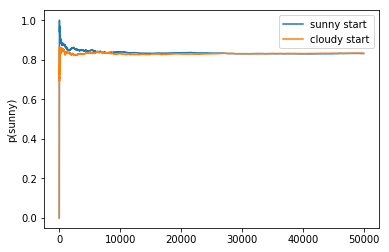

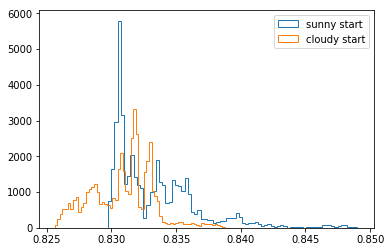

In [95]:
# Problem 3
from astroML import stats as astroMLstats

np.random.seed(3)

def simulate_weather(start, N):
    change_matrix = [0.9, 0.5]
    today = start
    p_sunny = np.empty(N)
    total_sunny = 0
    
    for i in range(1, N):
        change_chance = np.random.random()
        if change_chance > change_matrix[today]:
            today = (1 if today == 0 else 0)
        if today == 0:
            total_sunny = total_sunny + 1
        p_sunny[i] = total_sunny / i
    return p_sunny

# 0 = sunny, 1 = cloudy
N = 50000
sunny_from_sunny = simulate_weather(0, N)
plt.plot(sunny_from_sunny, label='sunny start')
print("Sunny start day N p(sunny) = %.2f" % sunny_from_sunny[-2])
print("Sunny start day N+1 p(sunny) = %.2f" % sunny_from_sunny[-1])

sunny_from_cloudy = simulate_weather(1, N)
plt.plot(sunny_from_cloudy, label='cloudy start')
print("Cloudy start day N p(sunny) = %.2f" % sunny_from_cloudy[-2])
print("Cloudy start day N+1 p(sunny) = %.2f" % sunny_from_cloudy[-1])

plt.ylabel('p(sunny)')
plt.legend()
plt.show()

burn = 5000
burned_sunny = sunny_from_sunny[burn:]
burned_cloudy = sunny_from_cloudy[burn:]

def bins(data): #fancyhist wont work because of import errors :(
    sigmaG = astroMLstats.sigmaG(data)
    binsize = 2.7*sigmaG/(len(data)**(1/3)) #Complete
    bins = np.append(np.arange(start=data.min(),stop=data.max(),step=binsize),np.max(data)) #Complete
    return bins

plt.hist(burned_sunny, bins=bins(burned_sunny), histtype='step', label='sunny start')
plt.hist(burned_cloudy, bins=bins(burned_cloudy), histtype='step', label='cloudy start')
plt.legend()
plt.show()